In [7]:
from empca_residuals import *
from mask_data import bitsNotSet, badcombpixmask
from apogee.tools import bitmask as bm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
def newmaskFilter(sample,minstar=5,minSNR=100.):
    """                                                                              
    Returns True where sample properties match conditions                            
                                                                                     
    sample:   an object of mask class                                                
    minstar:  minimum number of unmasked stars required at a pixel for that          
              pixel to remain unmasked
    minSNR:   minimum SNR on which to cut pixels
                                                                                     
    """
    # Artificially reduce SNR by increasing uncertainty where SNR is high            
    sample.spectra_errs[sample._SNR>200] = sample.spectra[sample._SNR>200]/200.
    sample._SNR = sample.spectra/sample.spectra_errs
    # Breakdown badcombpixmask (from data.py) into each individual bit flag          
    maskbits = bm.bits_set(badcombpixmask)
    # Mask where SNR low or where something flagged in bitmask                       
    mask = (sample._SNR < minSNR) | bitsNotSet(sample._bitmasks,maskbits)
    # Calculate the number of masked stars at each pixel                             
    flaggedstars = np.sum(mask,axis=0)
    # Flag pixels where there aren't enough stars to do the fit                      
    flaggedpix = flaggedstars > (sample.numberStars-minstar)
    mask.T[flaggedpix]=True
    return mask

In [10]:
rc12= empca_residuals('apogee','red_clump',newmaskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [11]:
rc12.findResiduals(gen=True)

In [13]:
rc13= empca_residuals('apogee','red_clump',newmaskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [14]:
rc13.findResiduals(gen=True)

In [15]:
Vdata12 = np.ma.var(rc12.residuals)
Vnoise12 = np.ma.mean(rc12.spectra_errs**2)
Vdata13 = np.ma.var(rc13.residuals)
Vnoise13 = np.ma.mean(rc13.spectra_errs**2)

In [16]:
print Vnoise12,Vdata12,Vnoise13,Vdata13

3.49771452377e-05 0.000100589995335 3.73881398292e-05 8.30399306344e-05


In [17]:
print 1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13

0.652280078937 0.549757092238


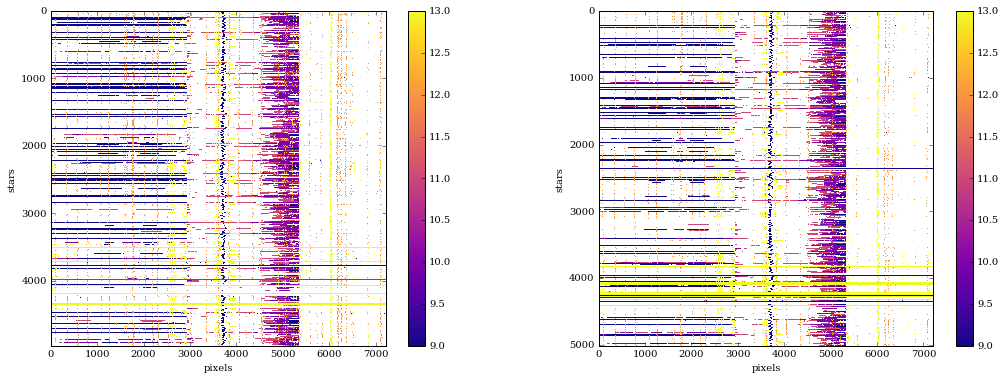

In [18]:
plt.figure(figsize=(18,6))
vmin=9
vmax=13
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks),vmin=vmin,vmax=vmax,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks),vmin=vmin,vmax=vmax,cmap='plasma')

In [19]:
badcombpixmask = bm.badpixmask()
badcombpixmask += 2**bitmask.apogee_pixmask_int("SIG_SKYLINE")
maskbits = bm.bits_set(badcombpixmask)
rc12bm = np.log2(rc12._bitmasks)
rc13bm = np.log2(rc13._bitmasks)

In [20]:
maskbits

[0, 1, 2, 3, 4, 5, 6, 7, 12]

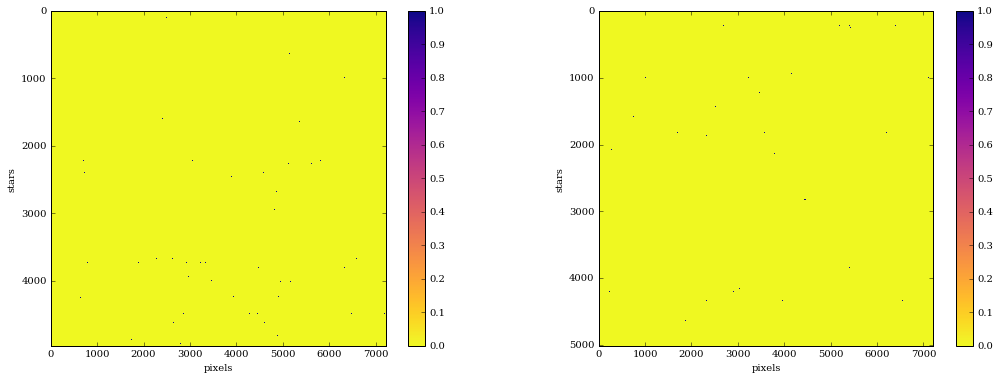

In [21]:
bit = 0
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bm==bit,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bm==bit,cmap='plasma_r')

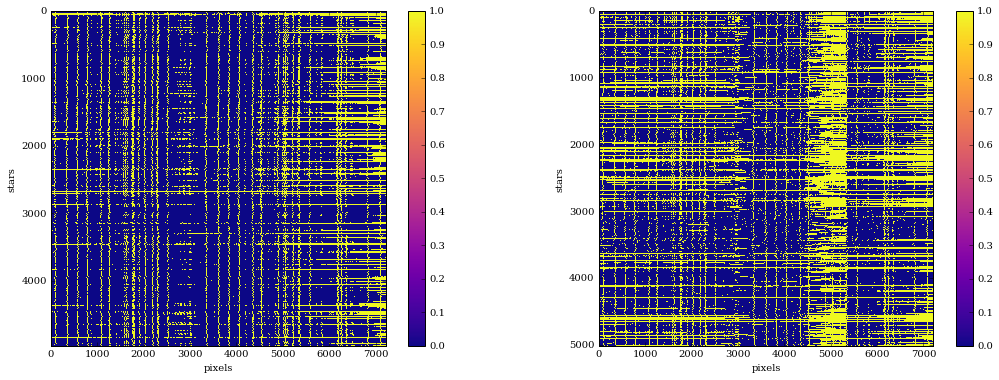

In [22]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere,cmap='plasma')

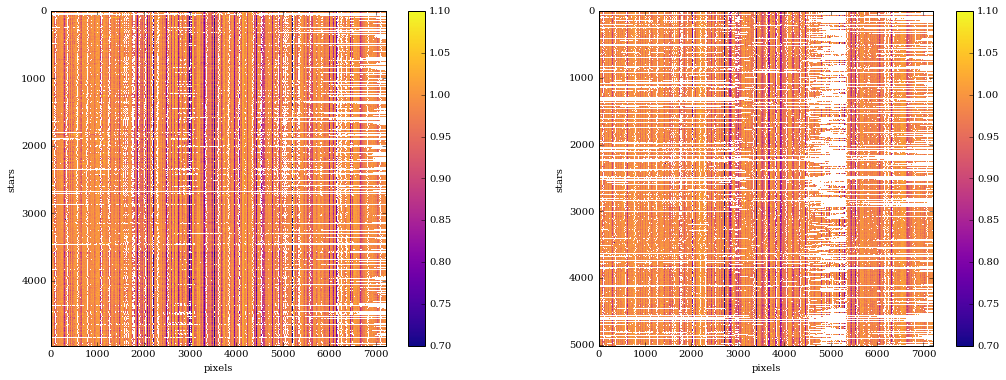

In [23]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')

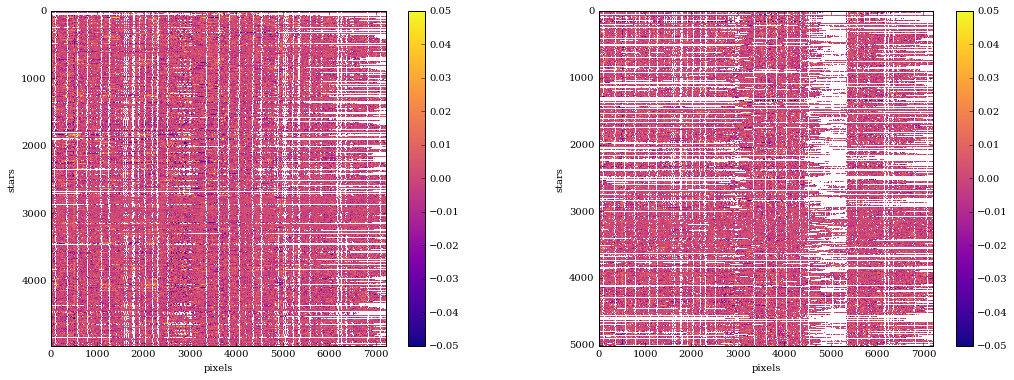

In [24]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals,vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals,vmin=-lim,vmax=lim,cmap='plasma')

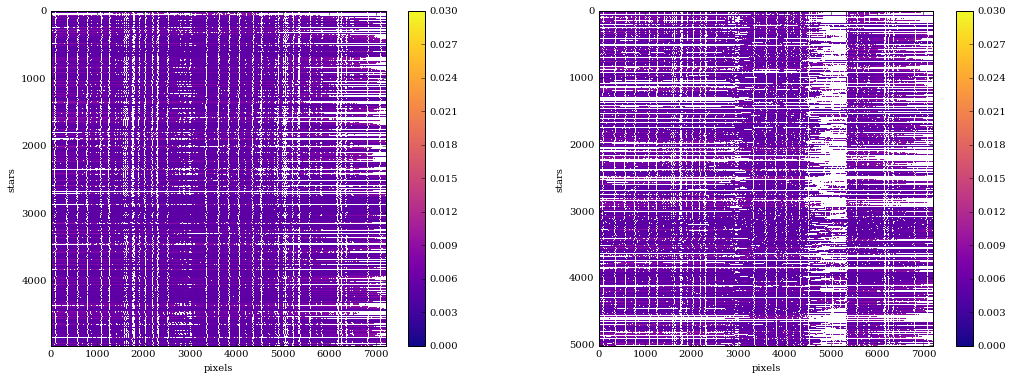

In [25]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs,vmin=0,vmax=lim,cmap='plasma')

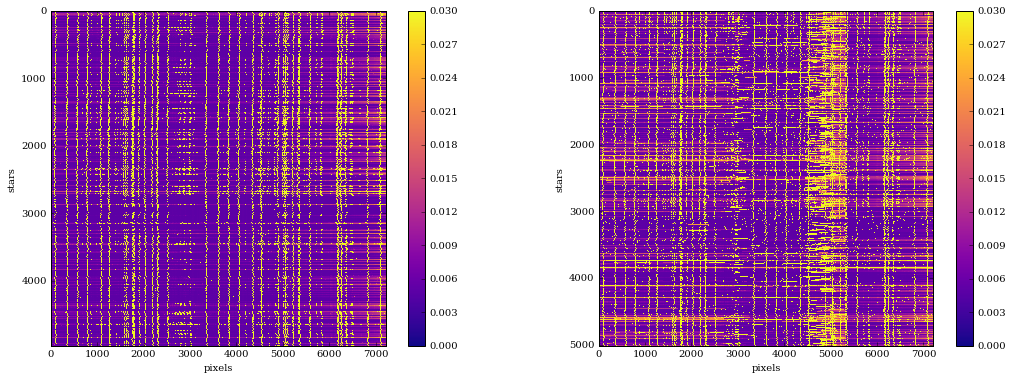

In [26]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

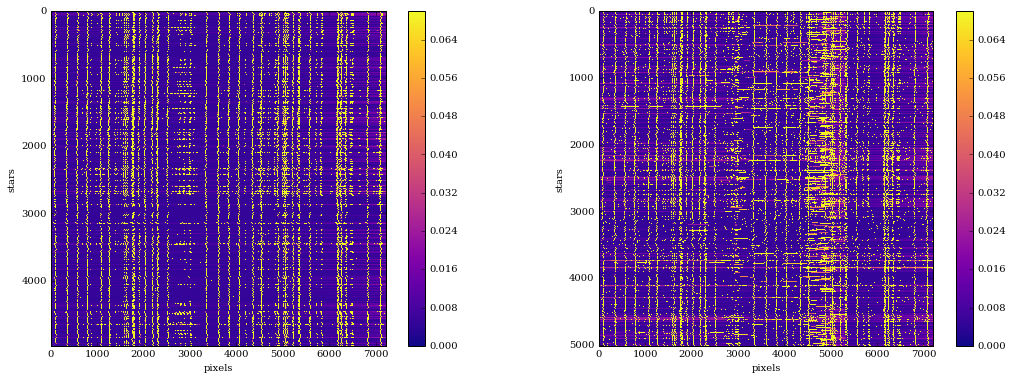

In [27]:
lim = 0.07
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

In [28]:
crossover13 = (np.array([i for i in range(len(rc13.matchingData['APOGEE_ID'])) if rc13.matchingData['APOGEE_ID'][i] in rc12.matchingData['APOGEE_ID']]),)
crossover12 = (np.array([i for i in range(len(rc12.matchingData['APOGEE_ID'])) if rc12.matchingData['APOGEE_ID'][i] in rc13.matchingData['APOGEE_ID']]),)

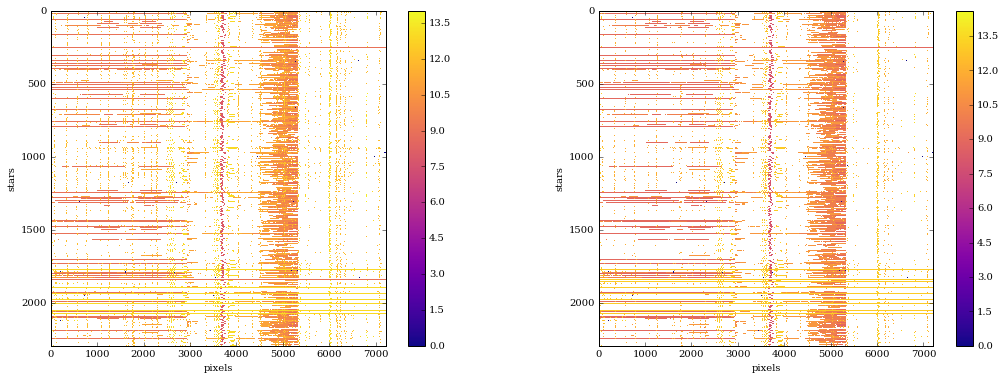

In [29]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks[crossover12]),cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks[crossover13]),cmap='plasma')

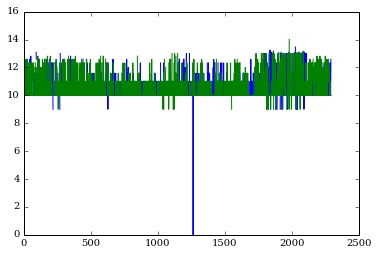

In [30]:
plt.plot(np.log2(rc13._bitmasks[crossover12].T[5000]))
plt.plot(np.log2(rc12._bitmasks[crossover12].T[5000]))

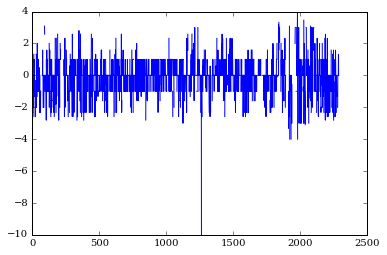

In [31]:
plt.plot(np.log2(rc13._bitmasks[crossover12].T[5000])-np.log2(rc12._bitmasks[crossover12].T[5000]))

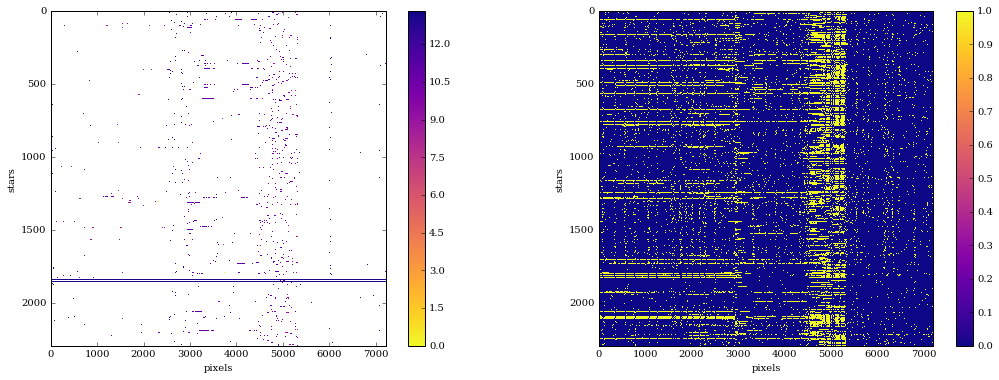

In [32]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
bmdiff=rc13._bitmasks[crossover13]-rc12._bitmasks[crossover12]
rc12.imshow(np.log2(bmdiff),cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc12.imshow(rc13._maskHere[crossover13]-rc12._maskHere[crossover12],cmap='plasma')

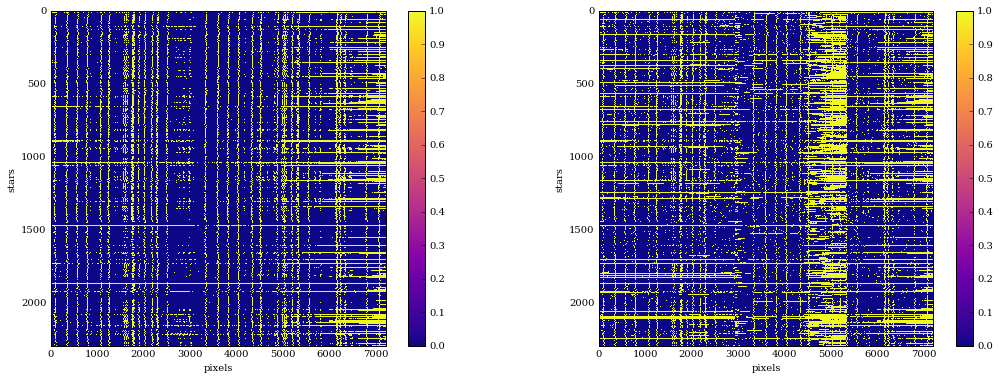

In [33]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere[crossover12],cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere[crossover13],cmap='plasma')

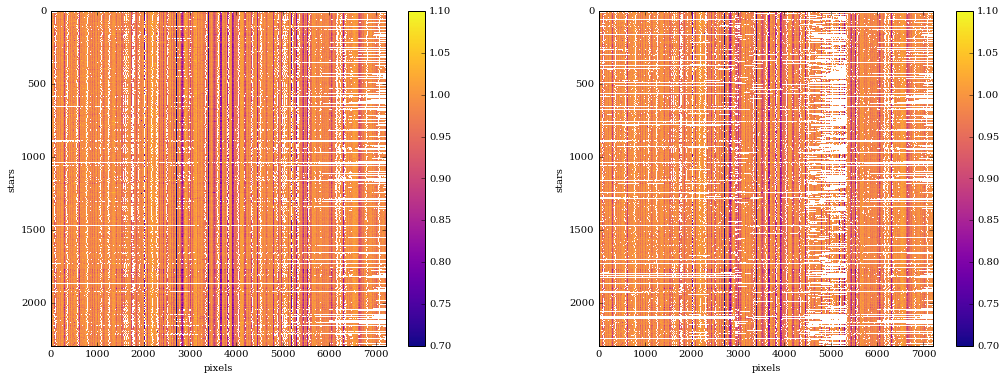

In [34]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra[crossover12],vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra[crossover13],vmin=minlim,vmax=maxlim,cmap='plasma')

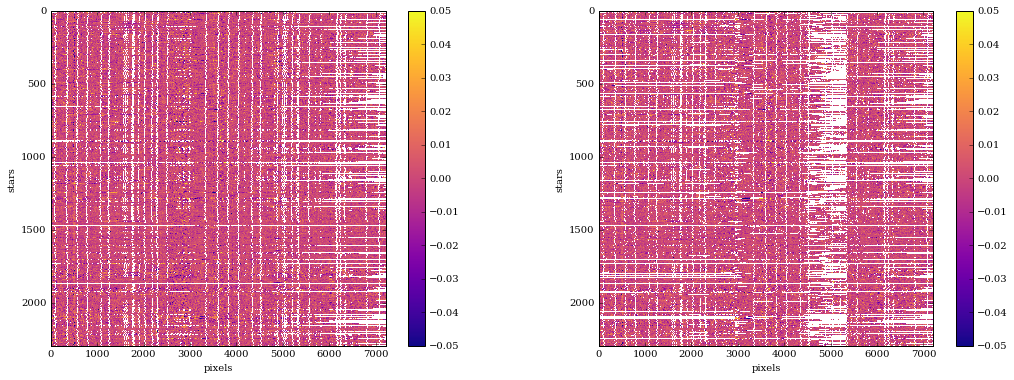

In [35]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals[crossover12],vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals[crossover13],vmin=-lim,vmax=lim,cmap='plasma')

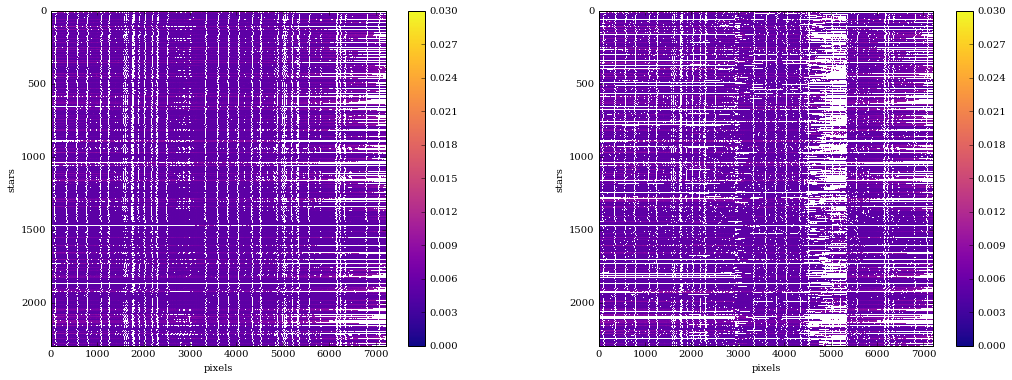

In [36]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs[crossover12],vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs[crossover13],vmin=0,vmax=lim,cmap='plasma')

In [37]:
Vdata12cross = np.ma.var(rc12.residuals[crossover12])
Vnoise12cross = np.ma.mean(rc12.spectra_errs[crossover12]**2)
Vdata13cross = np.ma.var(rc13.residuals[crossover13])
Vnoise13cross = np.ma.mean(rc13.spectra_errs[crossover13]**2)

In [38]:
print Vnoise12cross,Vdata12cross,Vnoise13cross,Vdata13cross

3.32221604865e-05 8.65834617189e-05 3.47577034083e-05 7.62038450371e-05


In [39]:
print 1-Vnoise12cross/Vdata12cross, 1-Vnoise13cross/Vdata13cross

0.616299004141 0.543885175461


In [40]:
badcombpixmask = bm.badpixmask()
badcombpixmask += 2**bitmask.apogee_pixmask_int("SIG_SKYLINE")
maskbits = bm.bits_set(badcombpixmask)
rc12bm = rc12._bitmasks[crossover12]
rc13bm = rc13._bitmasks[crossover13]

492


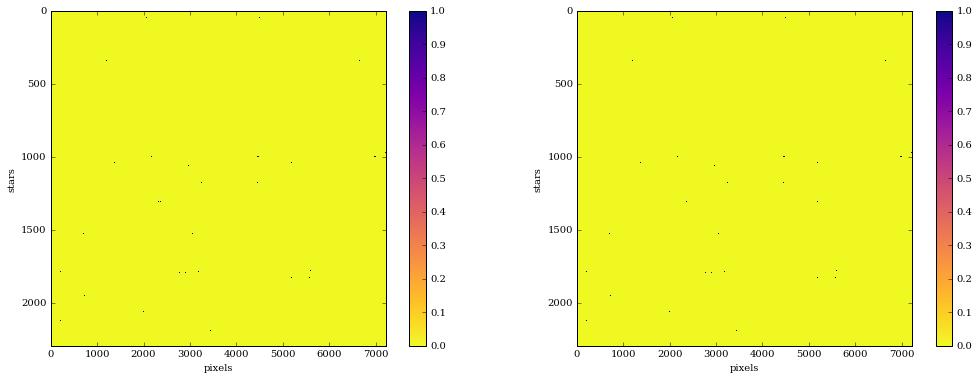

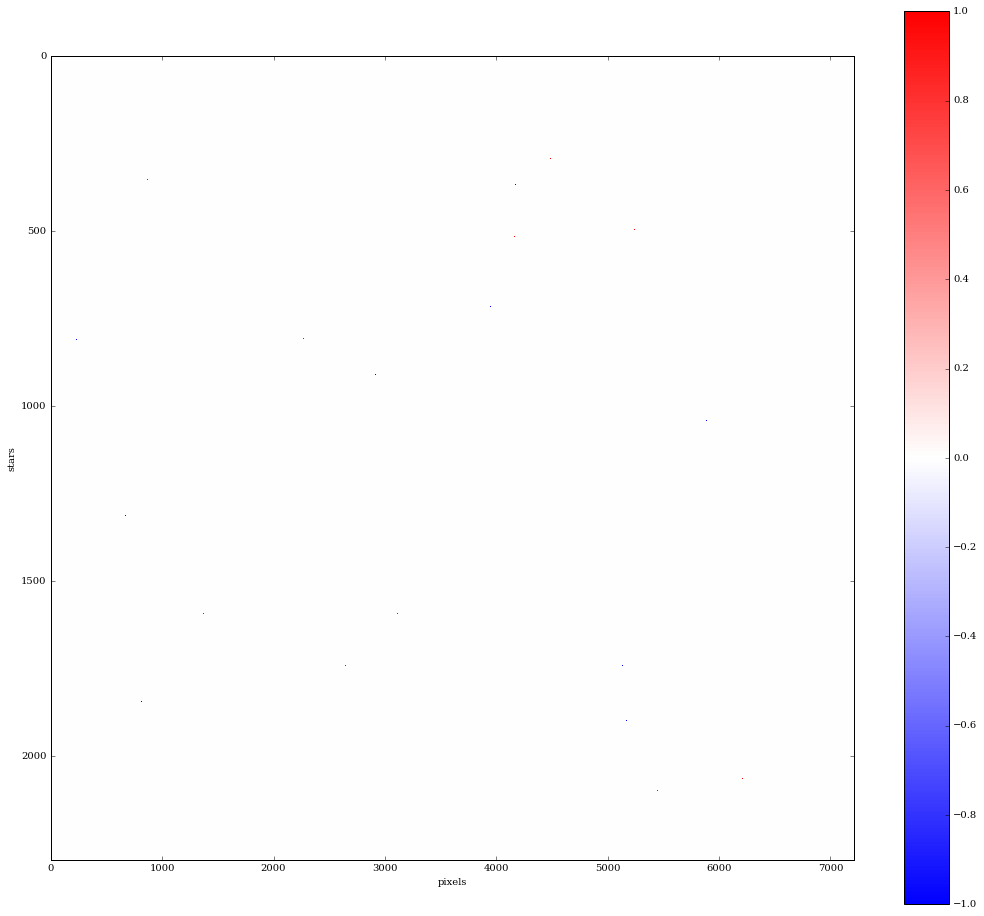

In [41]:
bit = 0
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


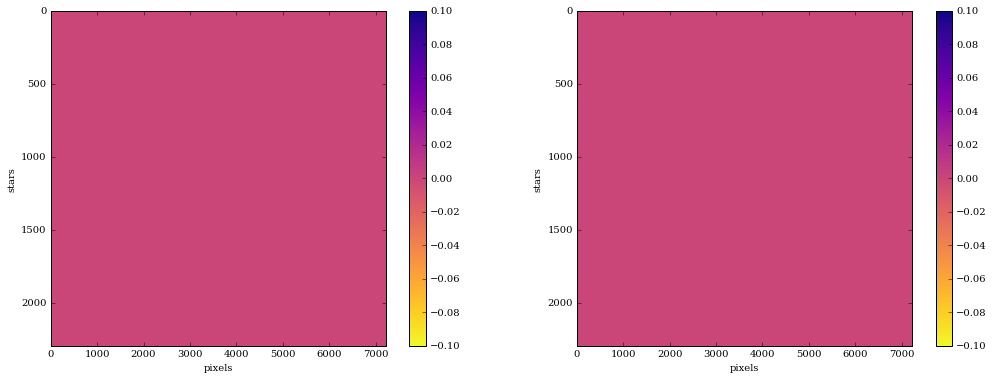

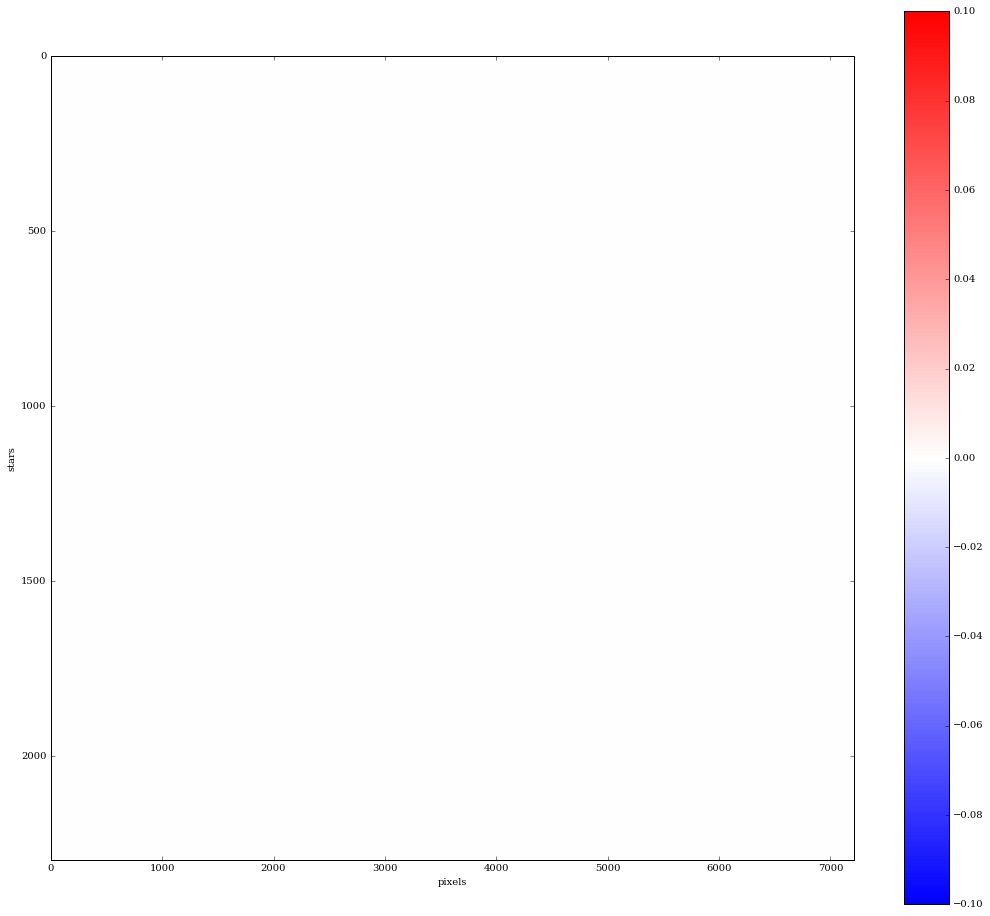

In [42]:
bit = 1
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


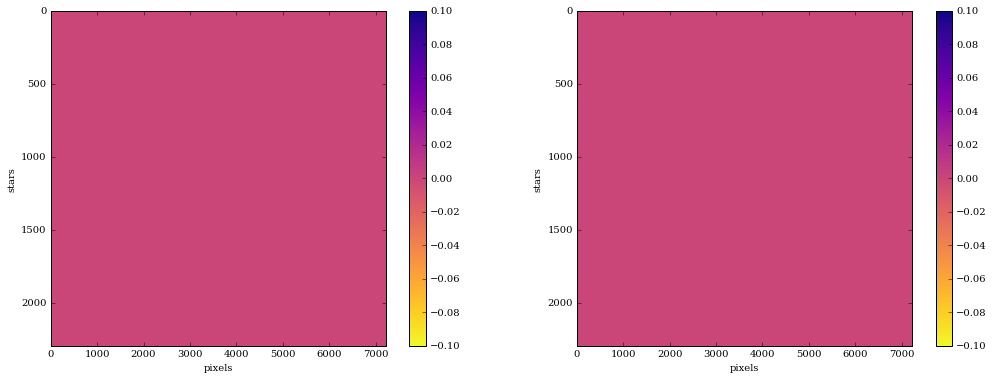

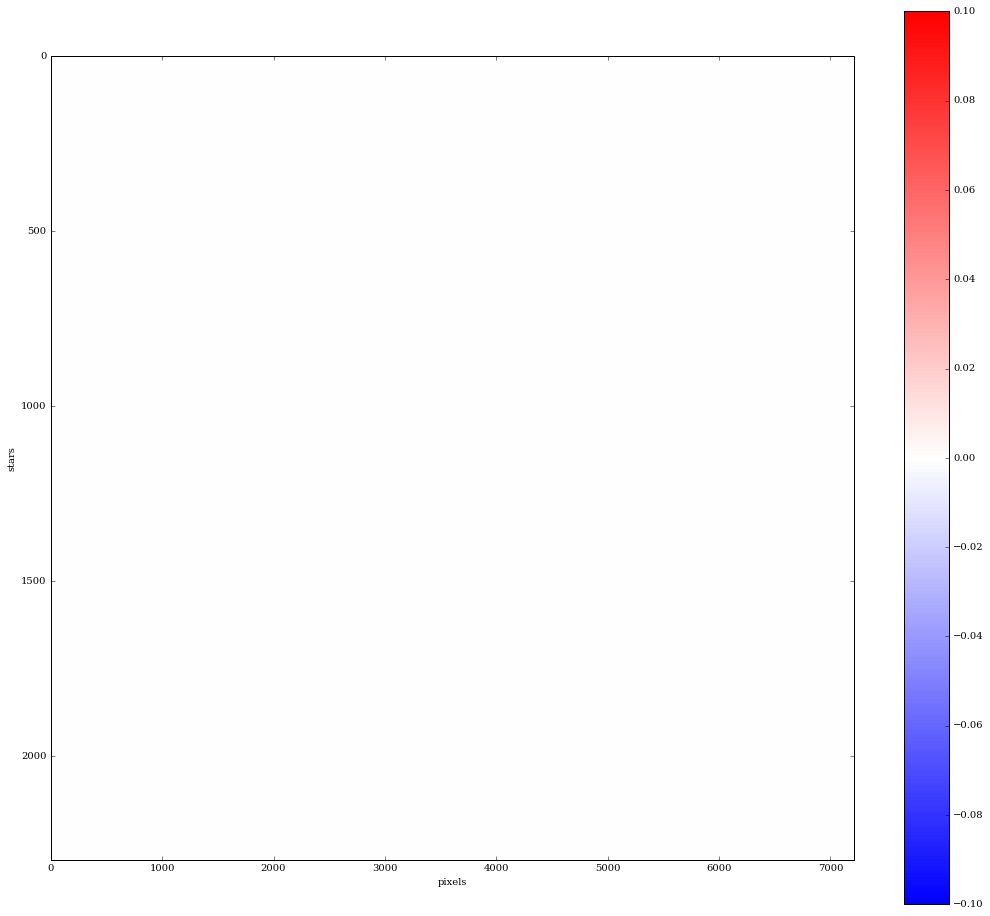

In [43]:
bit = 2
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


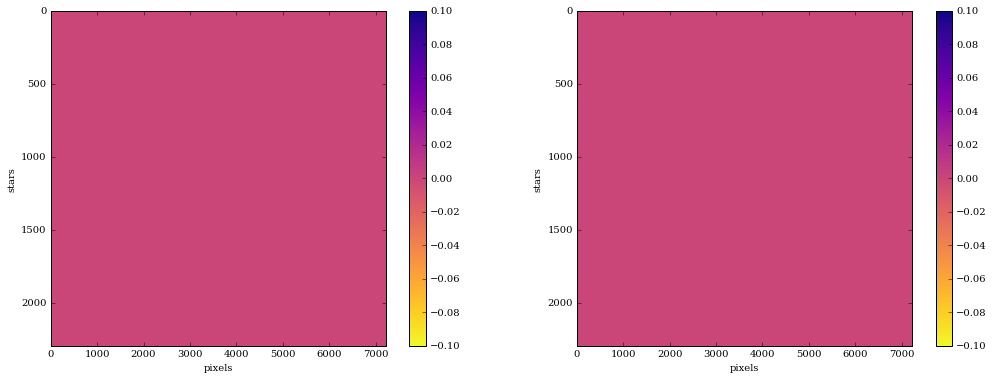

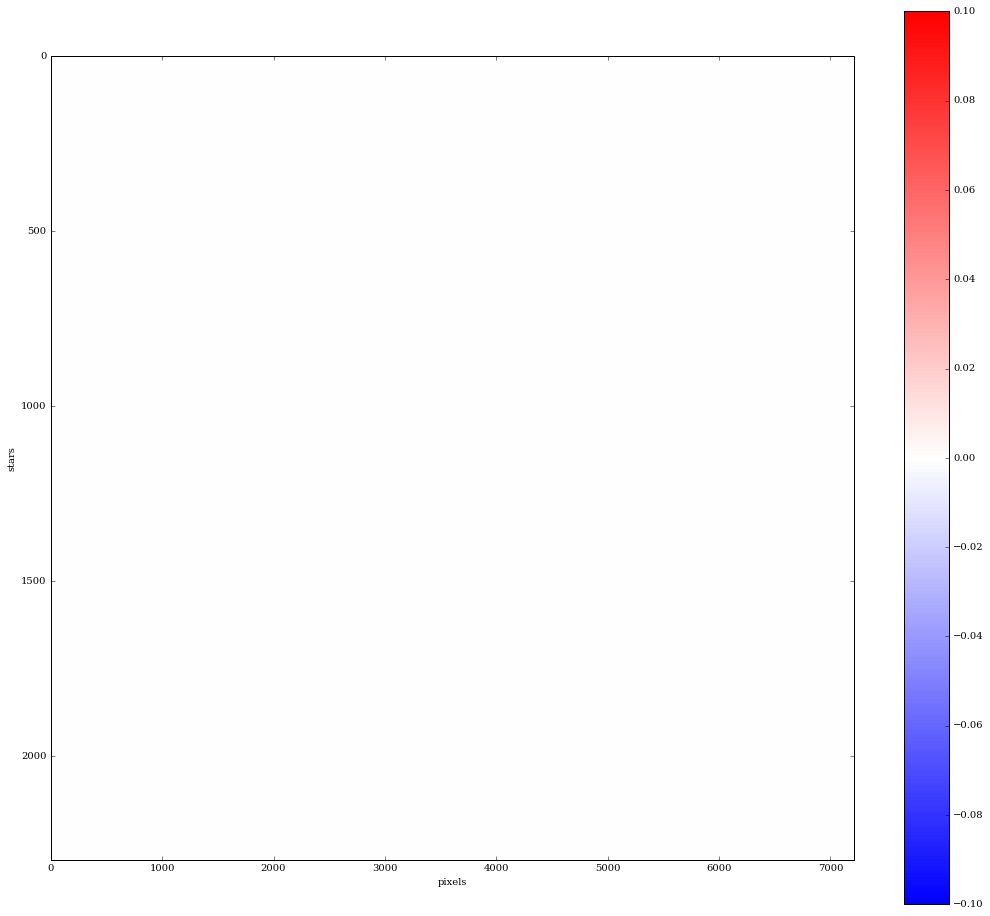

In [44]:
bit = 3
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


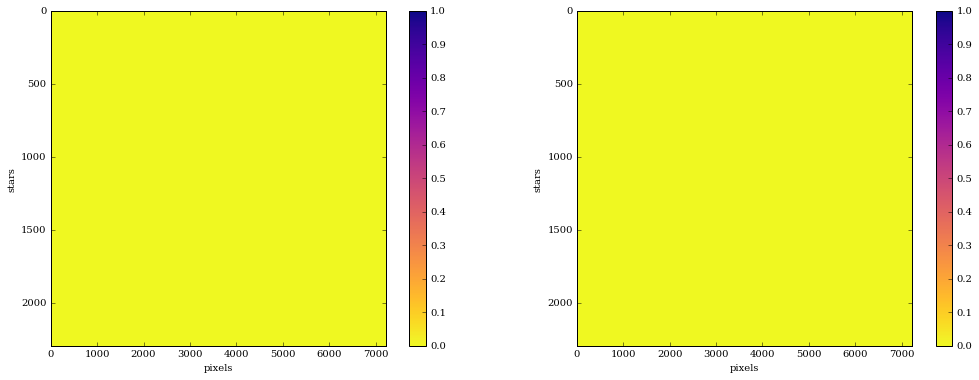

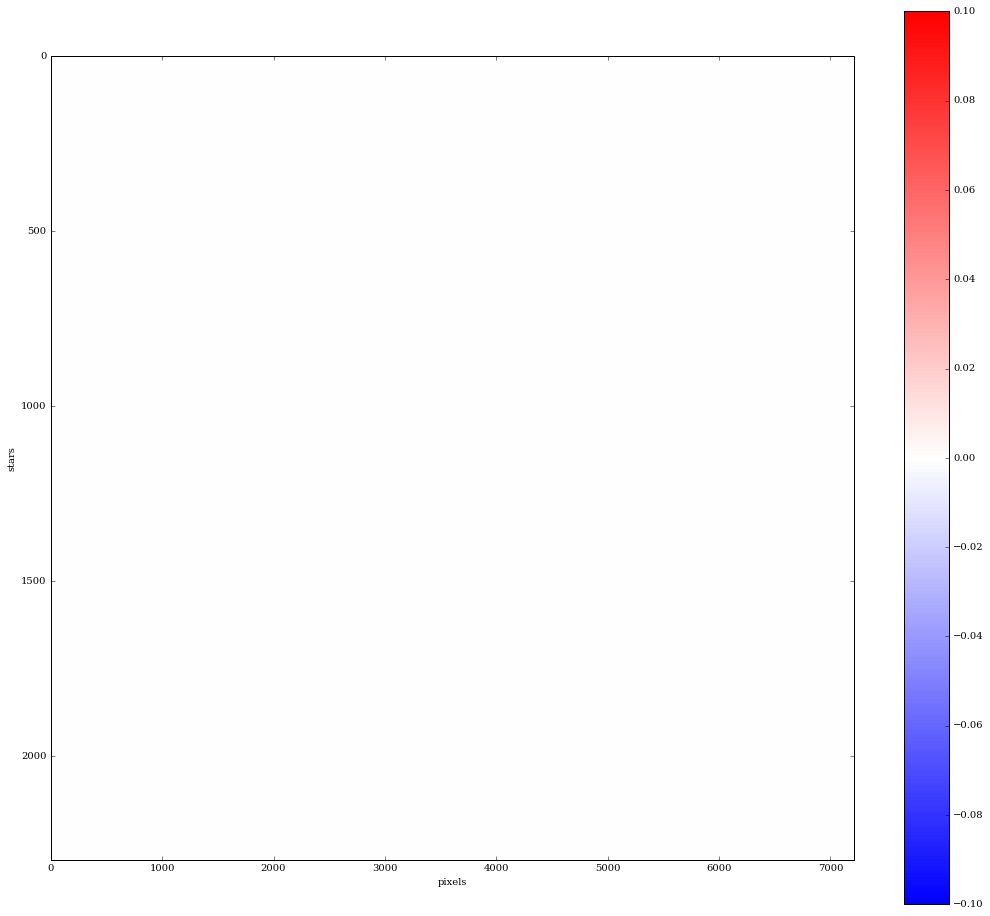

In [45]:
bit = 4
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


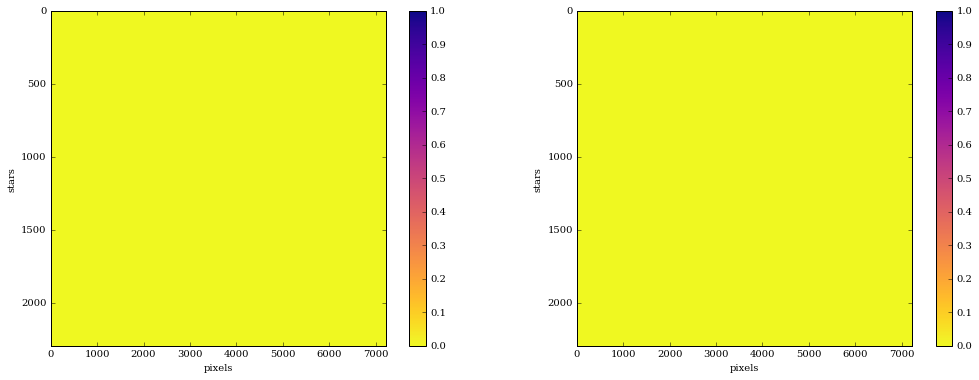

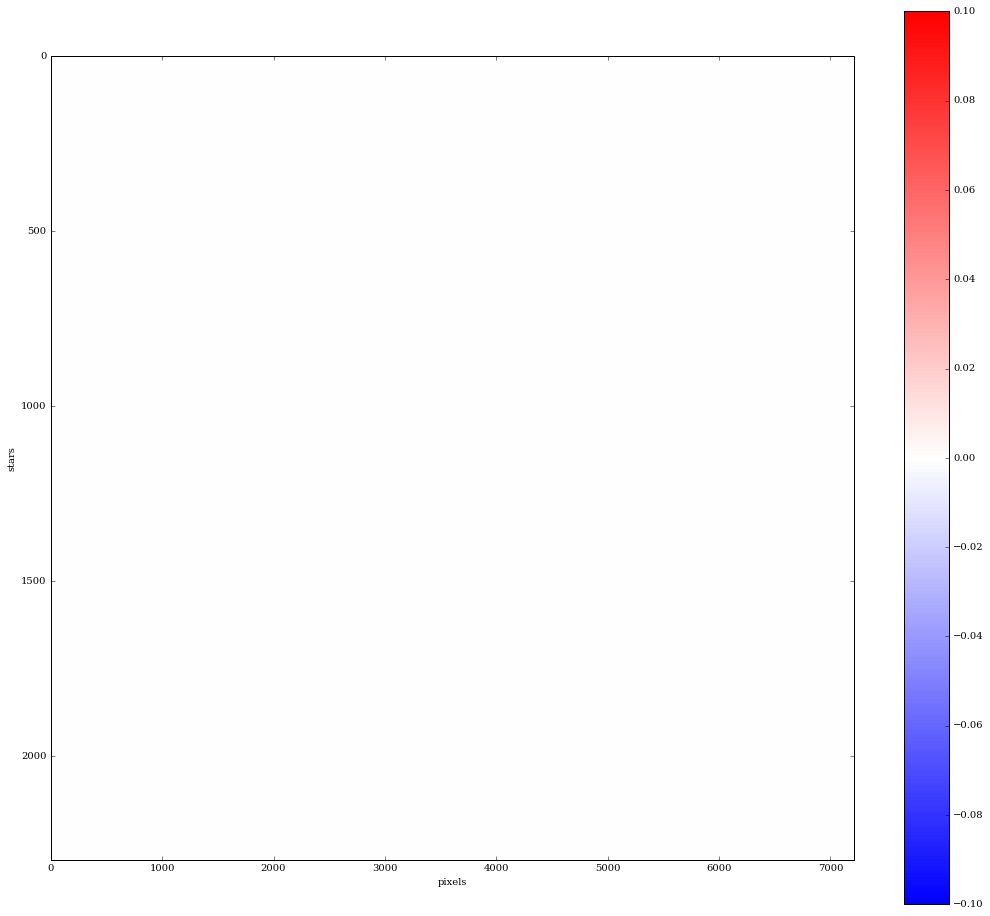

In [46]:
bit = 5
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


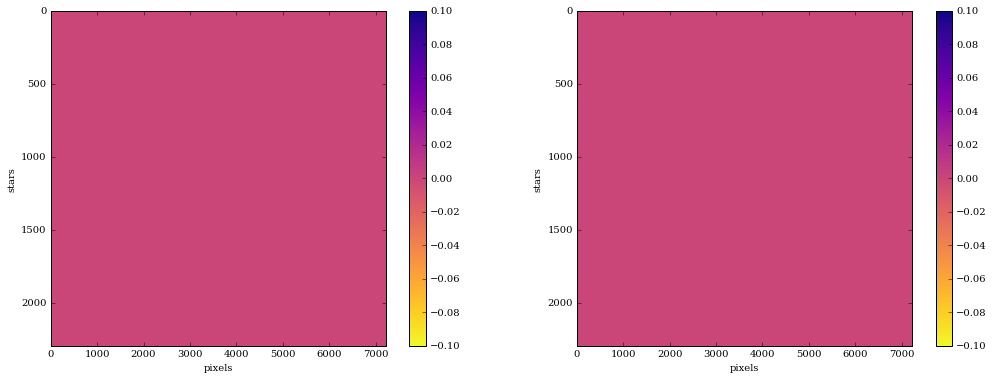

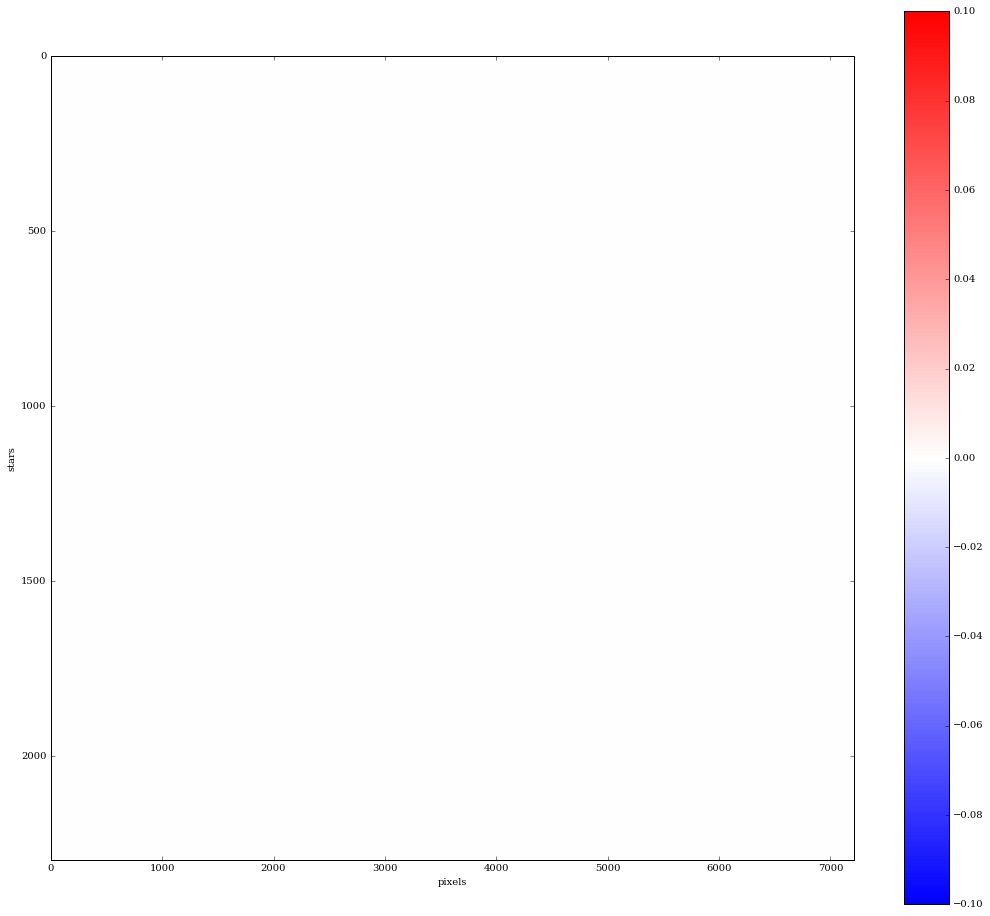

In [47]:
bit = 6
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


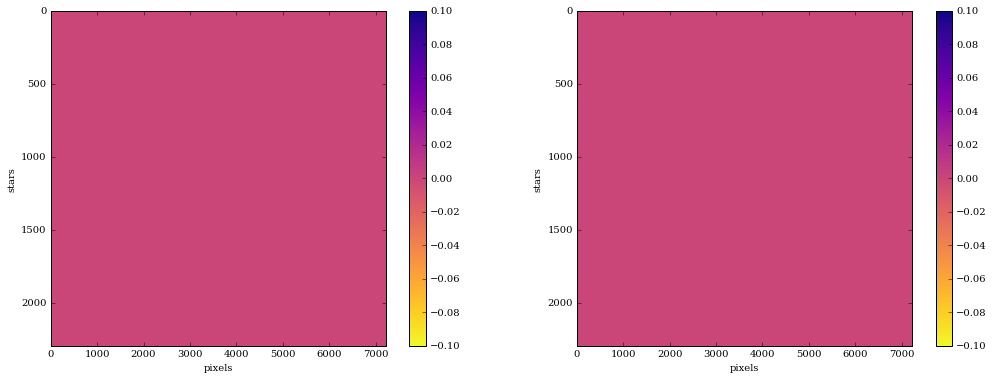

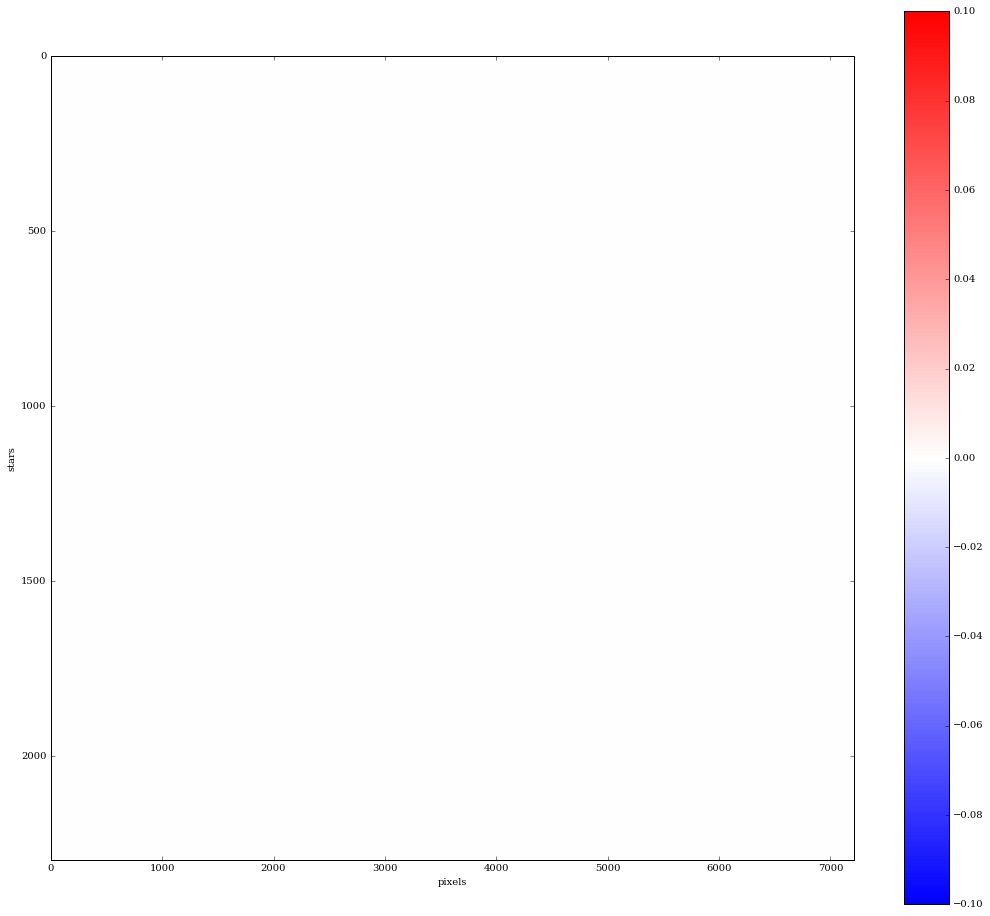

In [48]:
bit = 7
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

2661


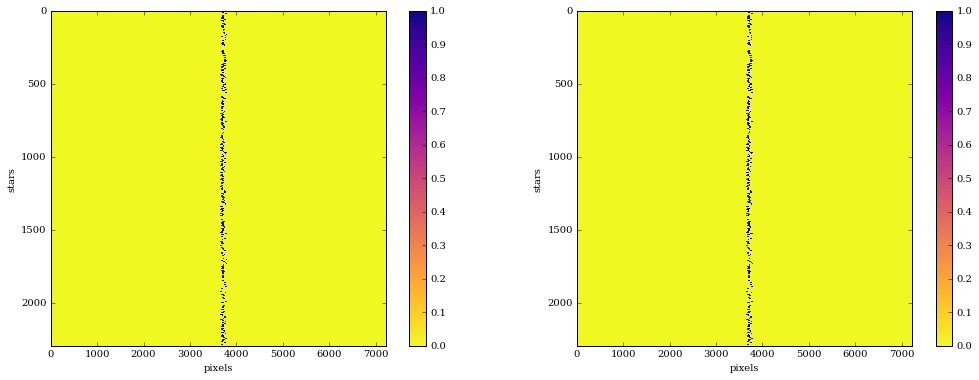

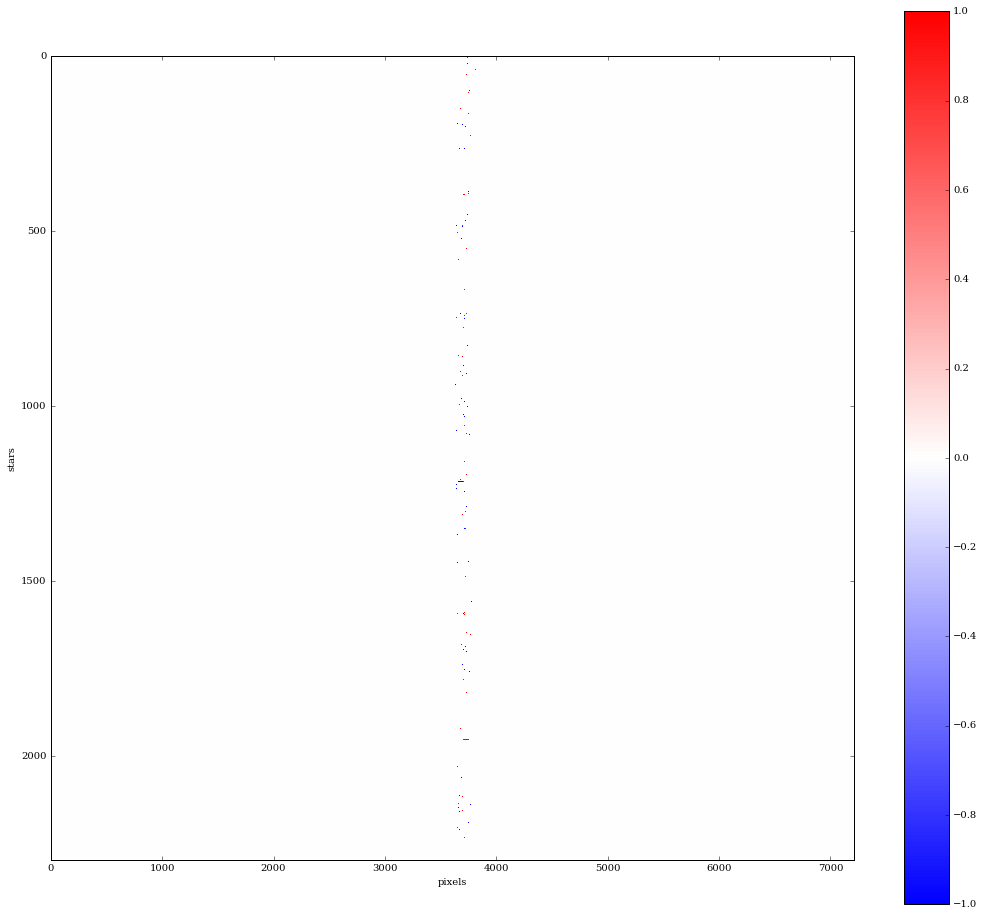

In [49]:
bit = 8
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

19149


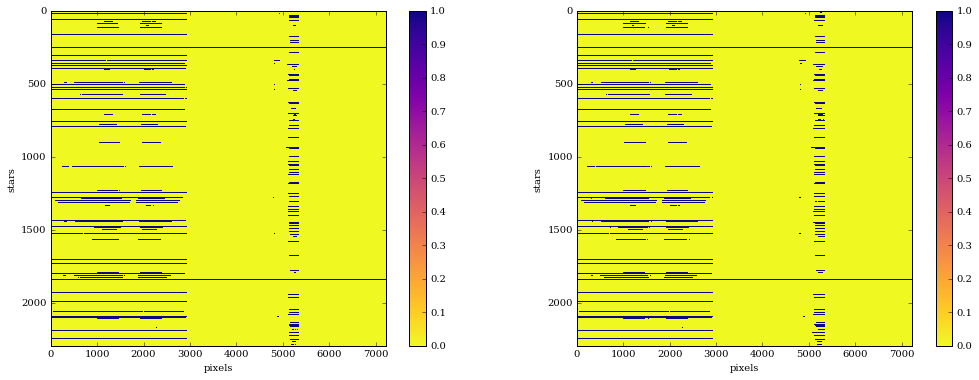

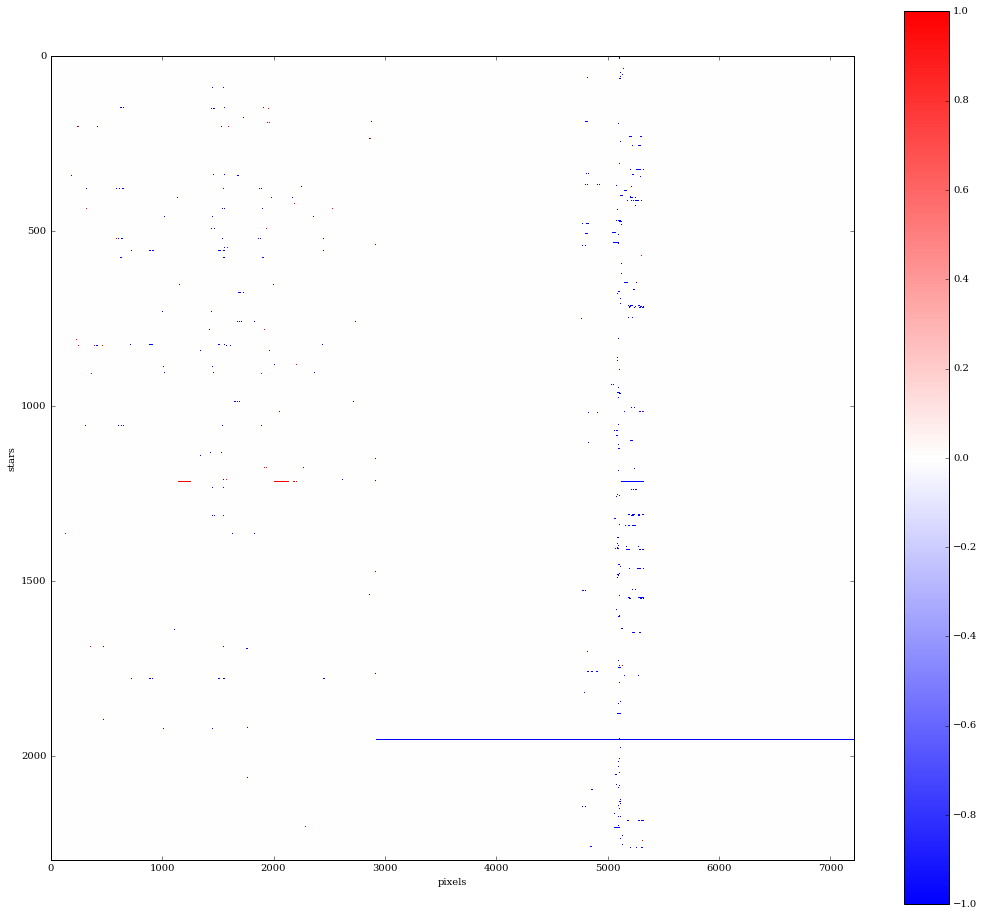

In [50]:
bit = 9
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

65543


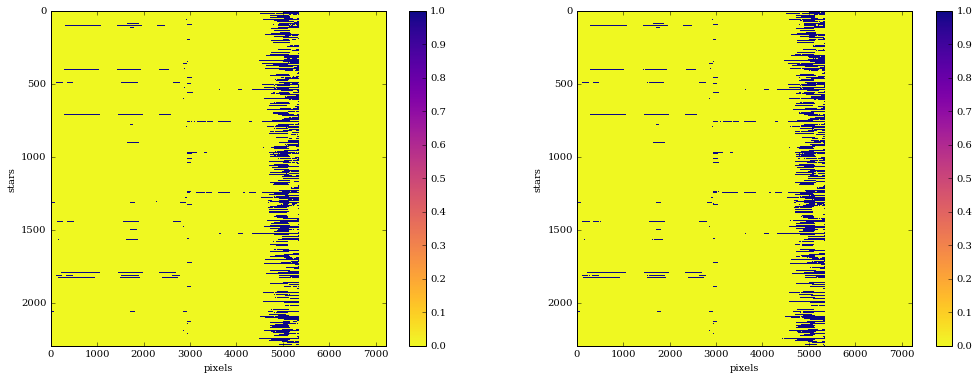

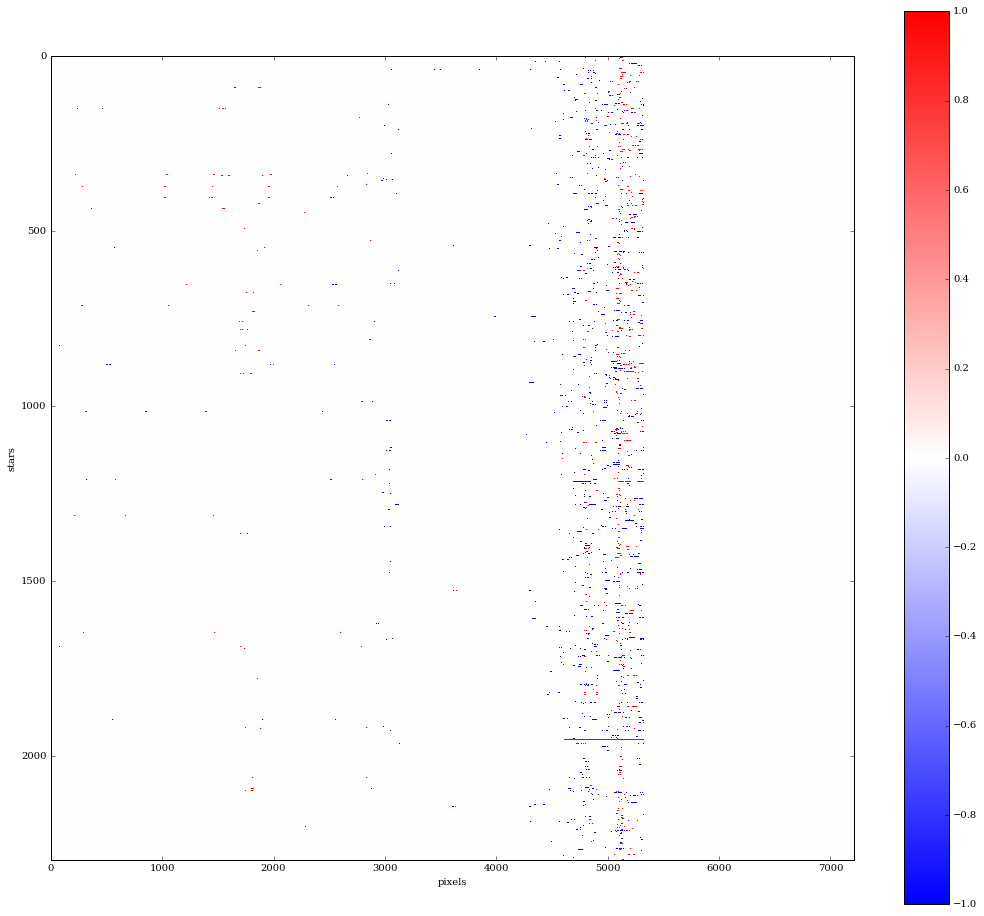

In [51]:
bit = 10
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

135590


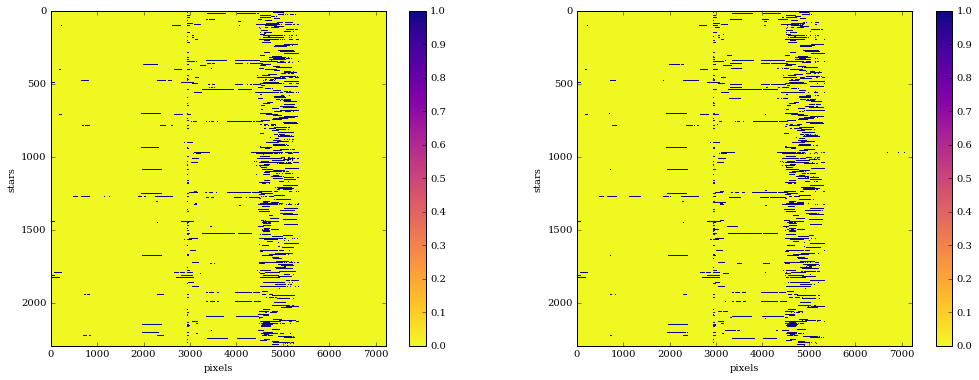

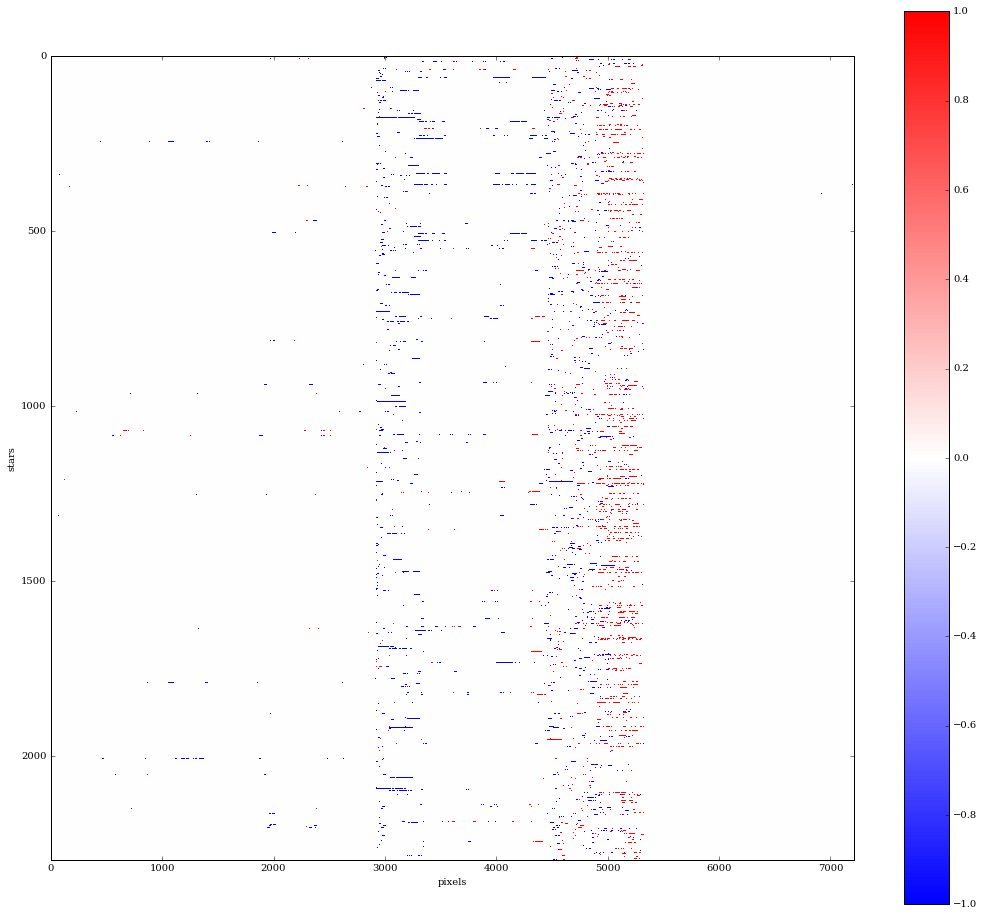

In [52]:
bit = 11
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

372153


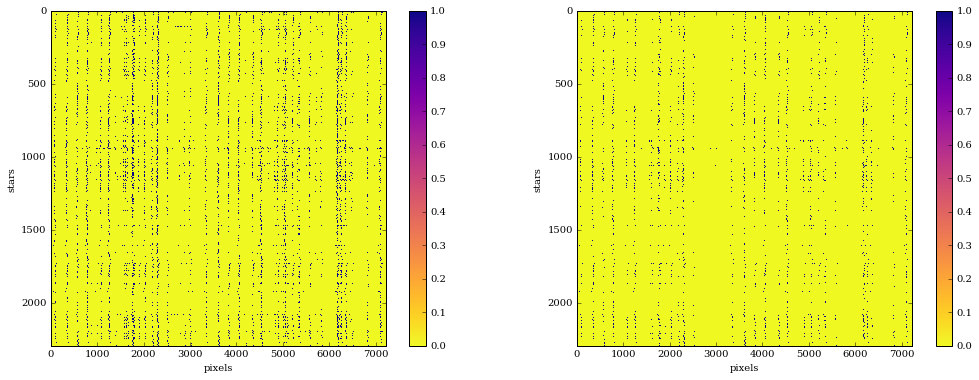

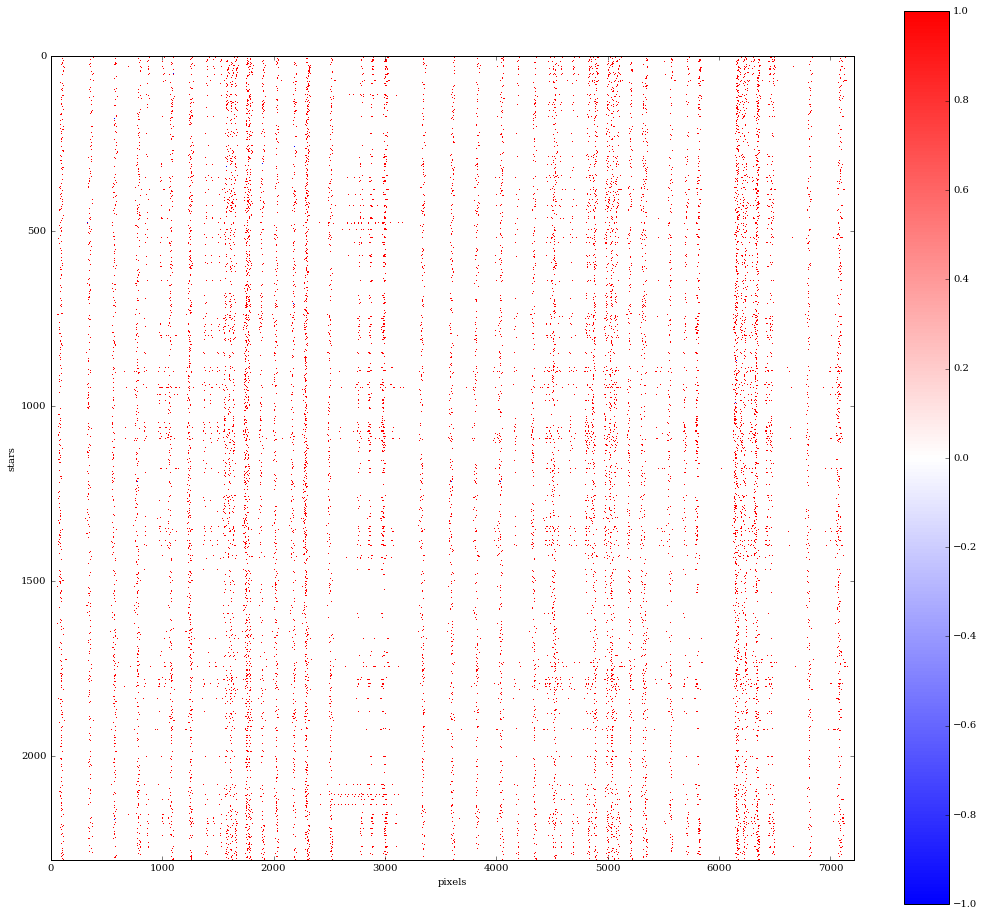

In [53]:
bit = 12
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

127501


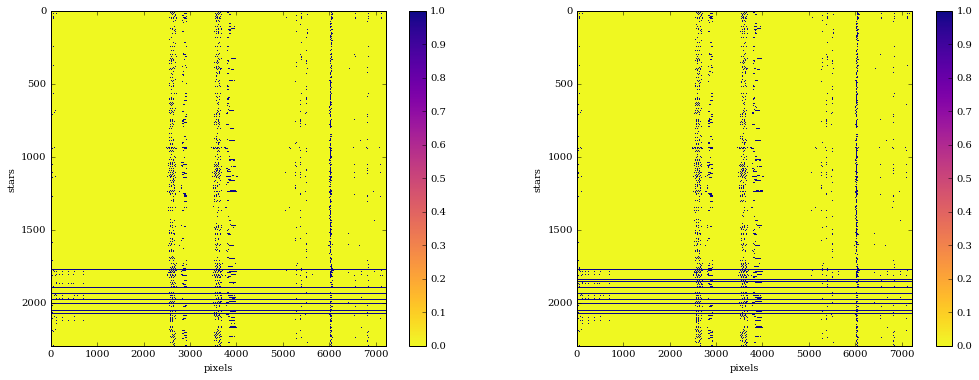

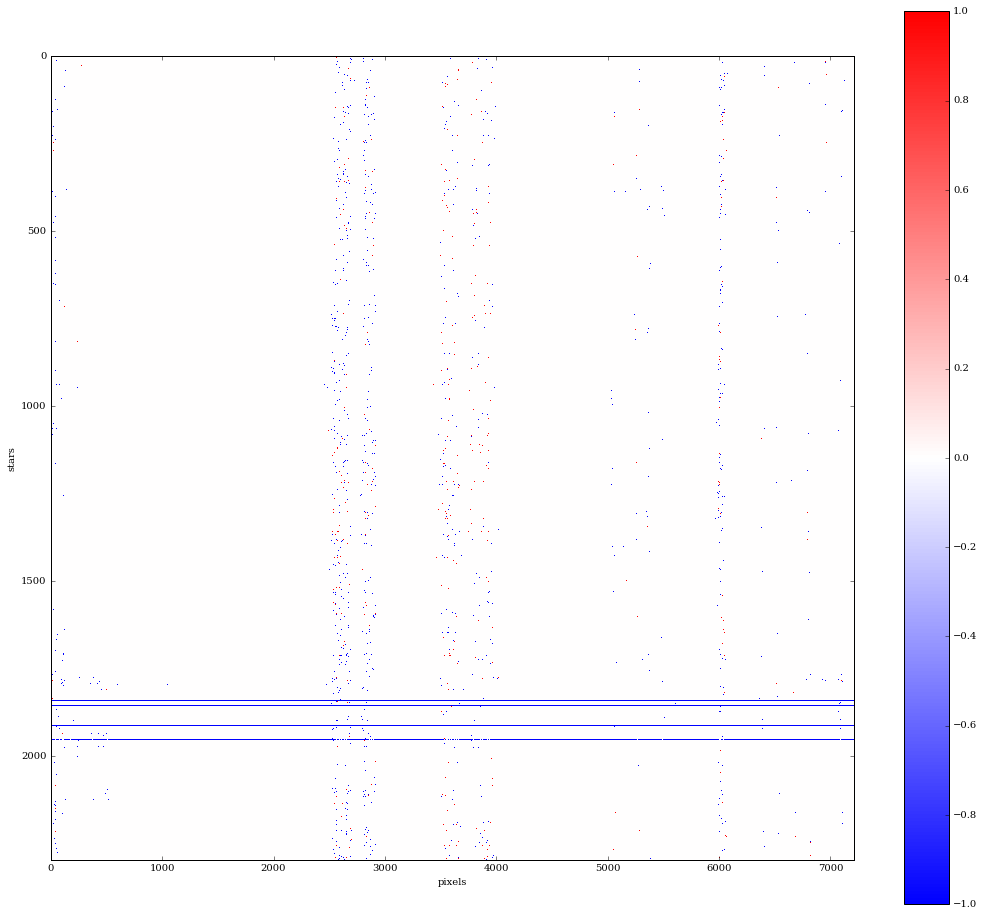

In [54]:
bit = 13
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


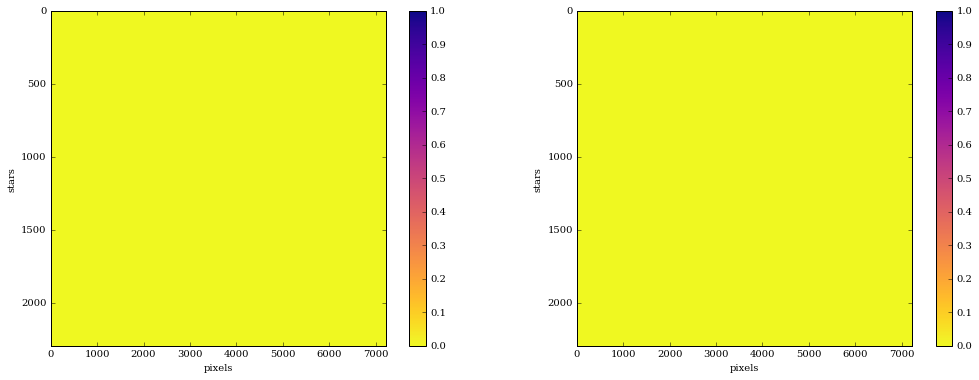

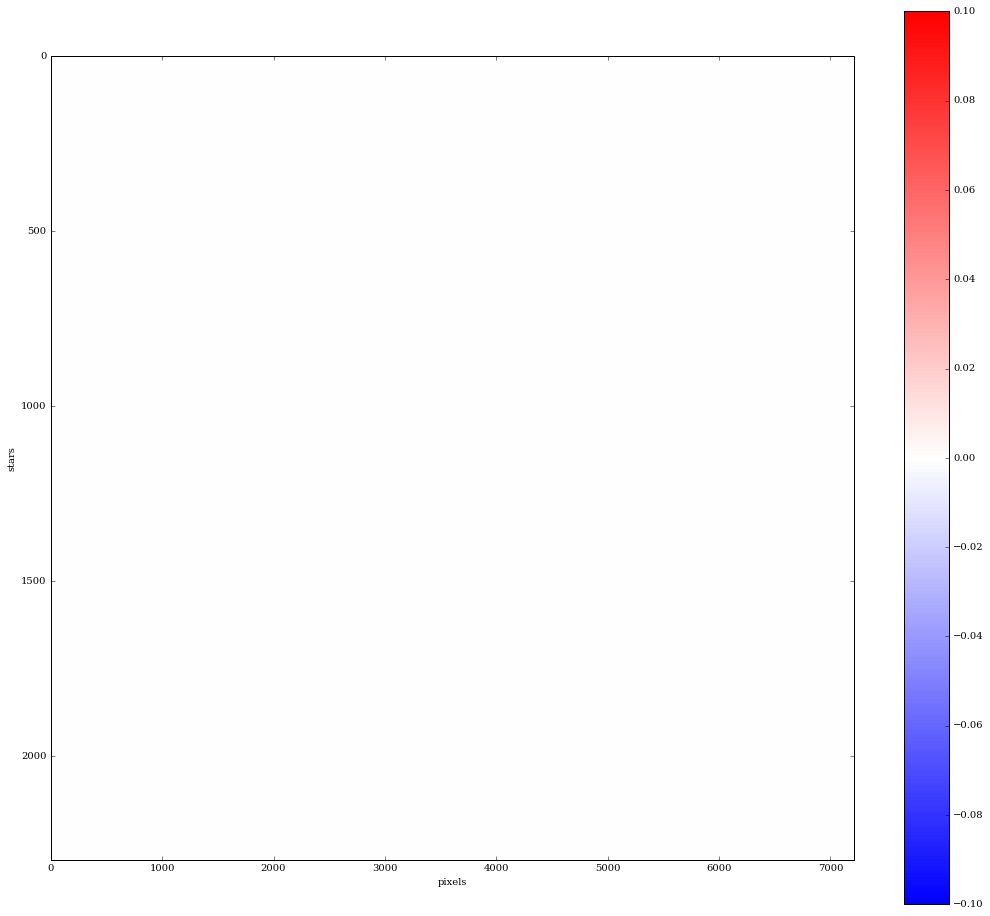

In [55]:
bit = 14
plt.figure(figsize=(18,6))
rc12bmmatch = bm.bit_set(bit,rc12bm)
rc13bmmatch = bm.bit_set(bit,rc13bm)
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])